### 회귀


머신러닝 관점에서 보면 독립변수는 피처에 해당되며 종속변수는 결정 값 입니다.  
회귀란 여러 개의 독립변수에 따라 종속변수가 어떻게 변화하는지, 즉 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것입니다.

회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 많은 유형으로 나뉘며, 가장 중요한 것은 회귀 계수입니다. 계수에 따라 선형 비선형으로 나뉘며, 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉩니다.

회귀는 예측값이 연속형 숫자 값이며, 가장 많이 사용되는 회귀는 선형 회귀 입니다.  
실제 값과 예측값의 차이( 오류의 제곱 값 )를 최소화하는 직선형 회귀선을 최적화하는 방식입니다.  
여기서도 과적합 문제를 해결하기 위해 회귀 계수에 페널티 값을 적용하는 여러 가지 규제가 존재합니다.

선형 회귀 모델 종류  
1. **일반 선형 회귀**  
: 예측값과 실제 값의 RSS( RESIDUAL SUM OF SQUARES )가 최소화되도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델입니다.  
2. **릿지**  
: 선형 회귀에 L2규제를 추가한 회귀 모델로, L2규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델입니다.  
3. **라쏘**  
: 선형 회귀에 L1규제를 적용한 회귀 모델로, L2규제는 회귀 계수 값의 크기를 줄이는데 반해, L1규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것입니다.
4. **엘라스틱넷**  
: L1, L2규제를 함께 결합한 모델로, 주로 피처가 많은 데이터 세트에서 적용되며, L1규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정합니다.
5. **로지스틱 회귀**  
: 분류에서 뛰어난 예측 성능을 보이는 선형 모델입니다.

In [6]:
from IPython.display import Image

![잔차](잔차.png)
실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부릅니다.  
최적의 회귀 모델을 만드는 것은 전체 데이터의 잔차( 오류 값 )의 합이 최소가 되는 모델을 만들고, 오류 값합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미입니다.

오류 값이 +, -가 될 수 있기 때문에 오류 합을 계산할 때는 절대값을 취해서 더하거나, 오류 값의 제곱을 구해서 더하는 방식을 취하며, 미분등의 계산을 편하게 하기 위해서 RSS방식으로 오류 합을 구합니다.  
* ***Error^2 = RSS.***  
  
회귀에서 RSS는 비용이며 W변수(회귀 계수)로 구성되는 RSS를 비용함수라고 합니다. 머신러닝 회귀는 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값( 오류 값 )을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것입니다.

#### 경사 하강법 - 비용 최소화하기
반복적으로 반환되는 비용 하수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W파라미터를 지속해서 보정해 나갑니다. 그러면서 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그 때의 W값을 최적 파라미터로 반환합니다.

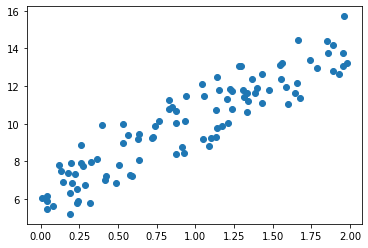

In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

plt.scatter(X,y)

경사하강법을 이용한 단순 선형 회귀는 w1과 w0을 모두 0으로 초기화한 뒤 특정 횟수만큼 반복하면서  
w1과 w0을 업데이트하는 것입니다.

In [95]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0) 
    
    y_pred = np.dot(X,w1.T) + w0
    diff= y-y_pred
    
    w0_factors = np.ones((N,1))
        
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

**반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성**

In [103]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

**예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행**

In [104]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


실제 선형식인 y= 4X + 6과 유사하게 w1은 4.028, w0은 6.490이 도출되었으며, 예측 오류 비용은 0.0775 입니다.

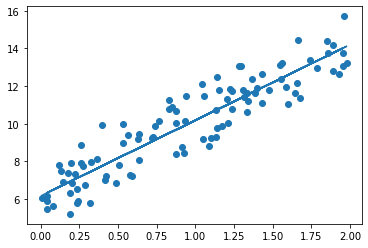

In [105]:
plt.scatter(X,y)
plt.plot(X,y_pred)

경사 하강법은 모든 학습데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기에 시간이 오래걸리는 단점이 존재합니다. 그래서 확률적 경사 하강법을 이용해 최적의 비용함수를 도출합니다.

**(미니 배치)확률적 경사 하강법을 이용한 최적 비용함수 도출**

In [106]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost= 1000
    iter_index=0
    
    for i in range(iters):
        np.random.seed(i)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
    
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y,learning_rate=0.01)
        w1= w1-w1_update
        w0= w0=w0_update
    
    return w1,w0

* numpy.random.seed(n)을 이용하여 임의의 시드를 생성할 수 있습니다. 시드 값에 따라 난수와 흡사하지만 항상 같은 결과를 반환합니다.
* np.random.permutation()을 이용하여 무작위로 섞인 배열을 만듭니다.

In [107]:
stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1: ",round(w1[0,0],3), "\nw0: ",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('stochastice_gradient_descent_total : {0:.3f}'.format(get_cost(y,y_pred)))

w1:  4.022 
w0:  6.162
stochastice_gradient_descent_total : 0.993


(미니 배치)확률적 경사 하강법과 경사 하강법으로 구한 값과 성능상의 큰 차이가 없으므로 큰 데이터를 처리할 경우에는 확률적 경사 하강법을 이용하는 것이 적절합니다.